In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'D:\Side Quests\Portfolio Project\movies.csv')

In [23]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [13]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [25]:
# Dropping any missing data
df = df.dropna(how='any',axis=0)

In [27]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [57]:
# Extracting the year
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(np.int64)

In [81]:
# Converting budget and gross to int
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').astype(np.int64)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').astype(np.int64)

# Drop the 'year' column
df.drop(columns=['year'], inplace=True)

In [83]:
print(df.dtypes)

name            object
rating          object
genre           object
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int64
dtype: object


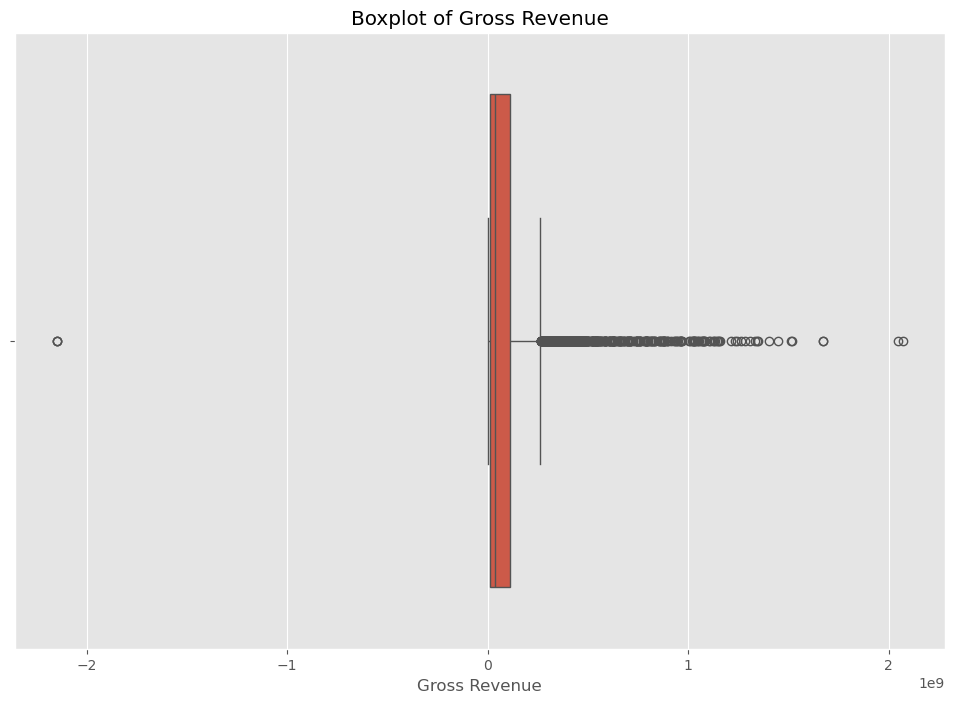

In [85]:
# Plotting the boxplot for 'gross' to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['gross'])
plt.title('Boxplot of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.show()

In [87]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [89]:
# Sort by 'gross' in descending order and display the result without changing the original df
sorted_df = df.sort_values(by=['gross'], ascending=False)
print(sorted_df)

                                            name rating      genre  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action   
7244                      Avengers: Infinity War  PG-13     Action   
7480                               The Lion King     PG  Animation   
6653                              Jurassic World  PG-13     Action   
6043                                The Avengers  PG-13     Action   
...                                          ...    ...        ...   
272                                     Parasite      R     Horror   
3203                                  Trojan War  PG-13     Comedy   
3045                                     Titanic  PG-13      Drama   
7445                           Avengers: Endgame  PG-13     Action   
5445                                      Avatar  PG-13     Action   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
724

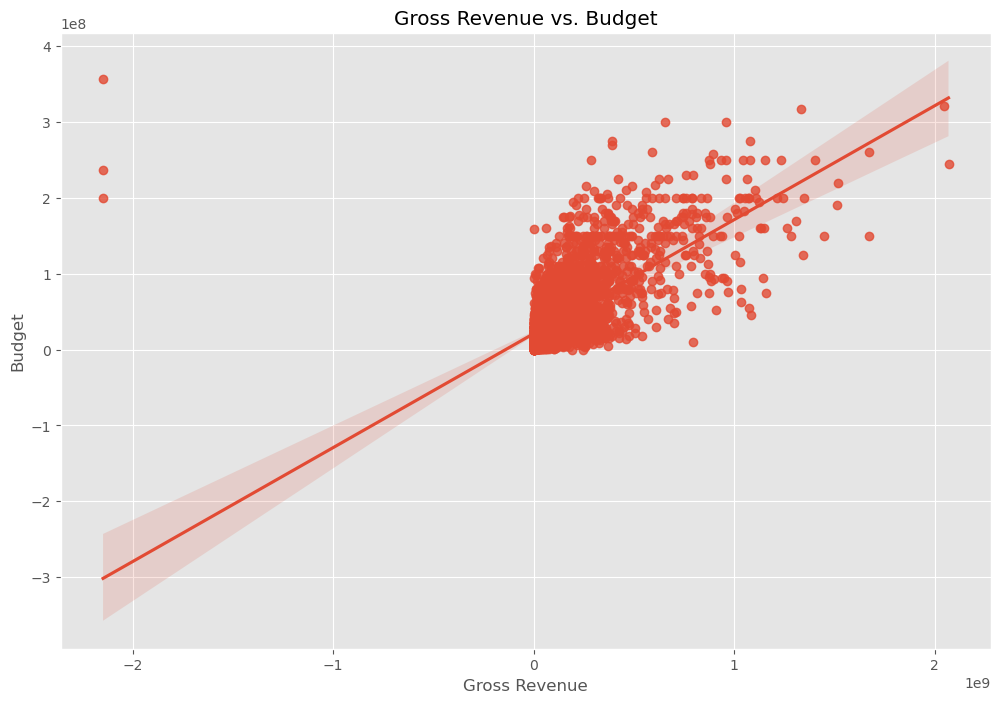

In [91]:
# Plotting the regression line between gross revenue and budget
plt.figure(figsize=(12, 8))
sns.regplot(x="gross", y="budget", data=df)
plt.title('Gross Revenue vs. Budget')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget')
plt.show()

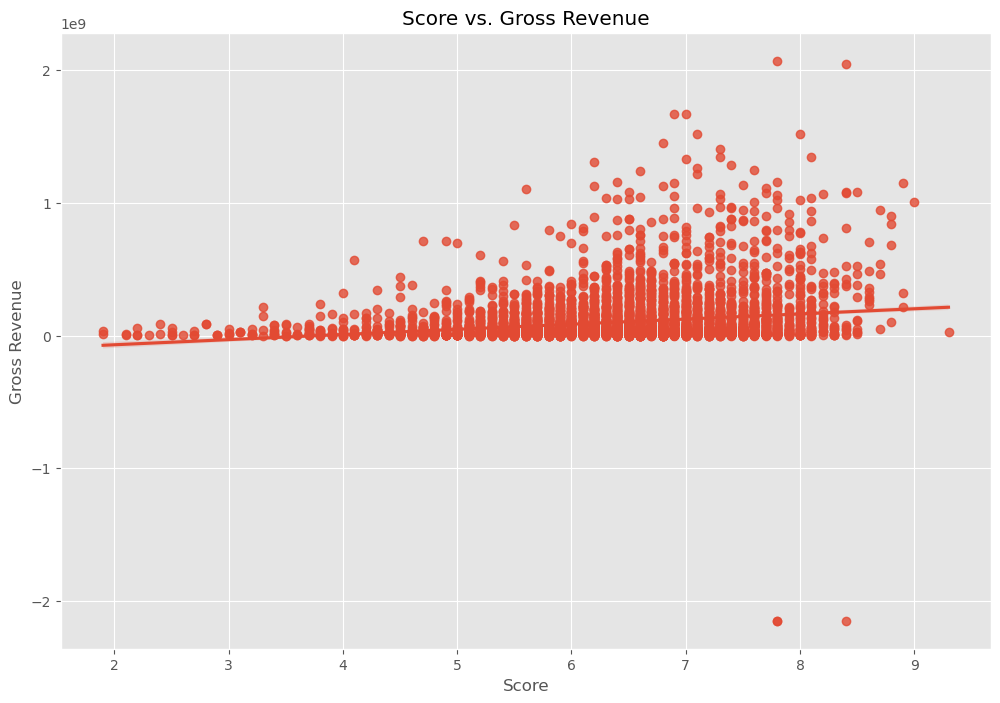

In [93]:
# Plotting the regression line between score and gross revenue
plt.figure(figsize=(12, 8))
sns.regplot(x="score", y="gross", data=df)
plt.title('Score vs. Gross Revenue')
plt.xlabel('Score')
plt.ylabel('Gross Revenue')
plt.show()

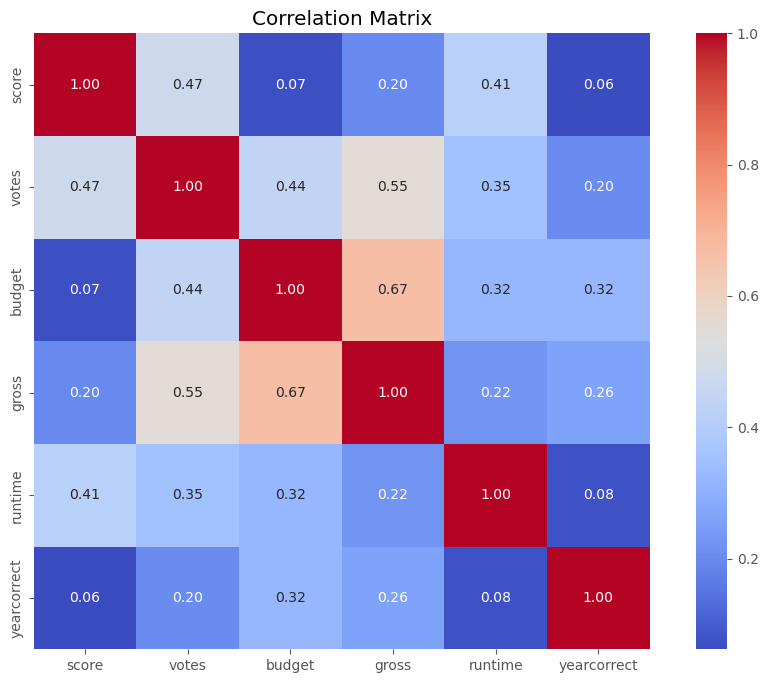

In [95]:
# Calculate the correlation matrix for only numeric columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

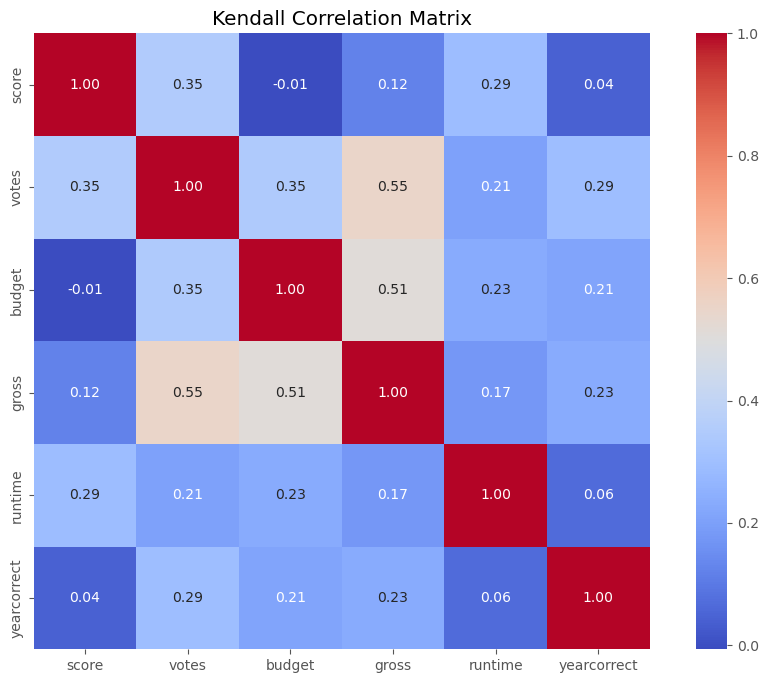

In [97]:
# Calculate the Kendall correlation matrix
kendall_correlation_matrix = df.select_dtypes(include=[np.number]).corr(method='kendall')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(kendall_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Kendall Correlation Matrix')
plt.show()

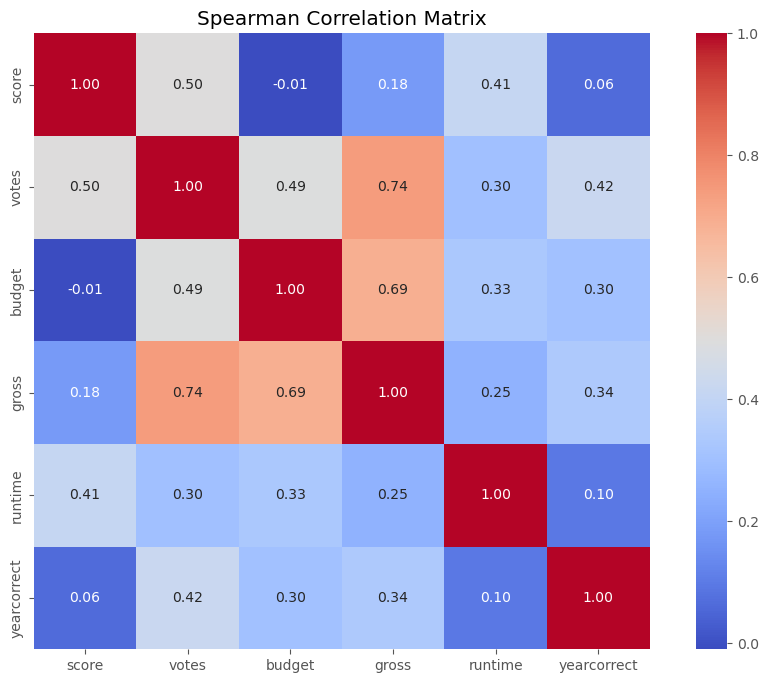

In [99]:
# Calculate the Spearman correlation matrix
spearman_correlation_matrix = df.select_dtypes(include=[np.number]).corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

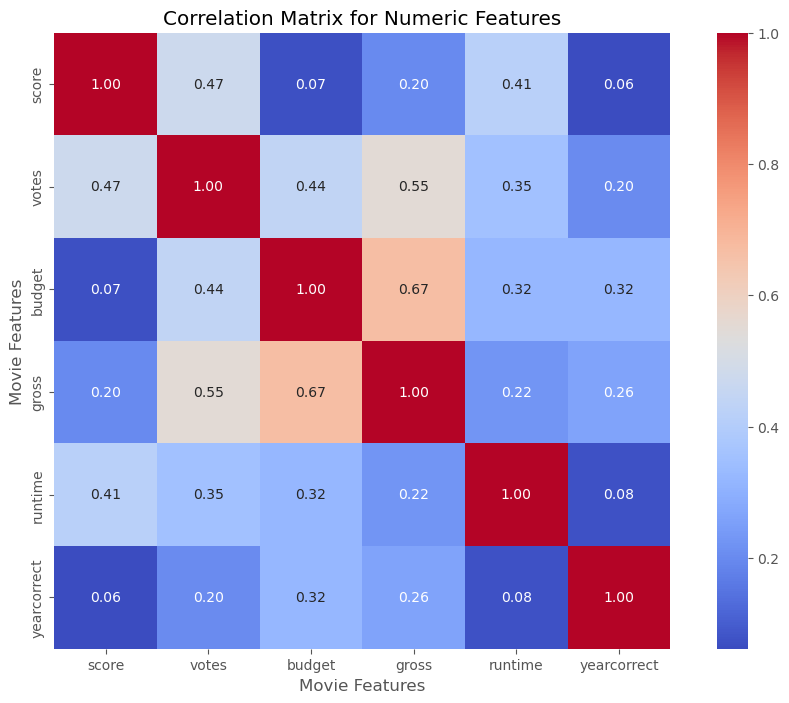

In [101]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Specify figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

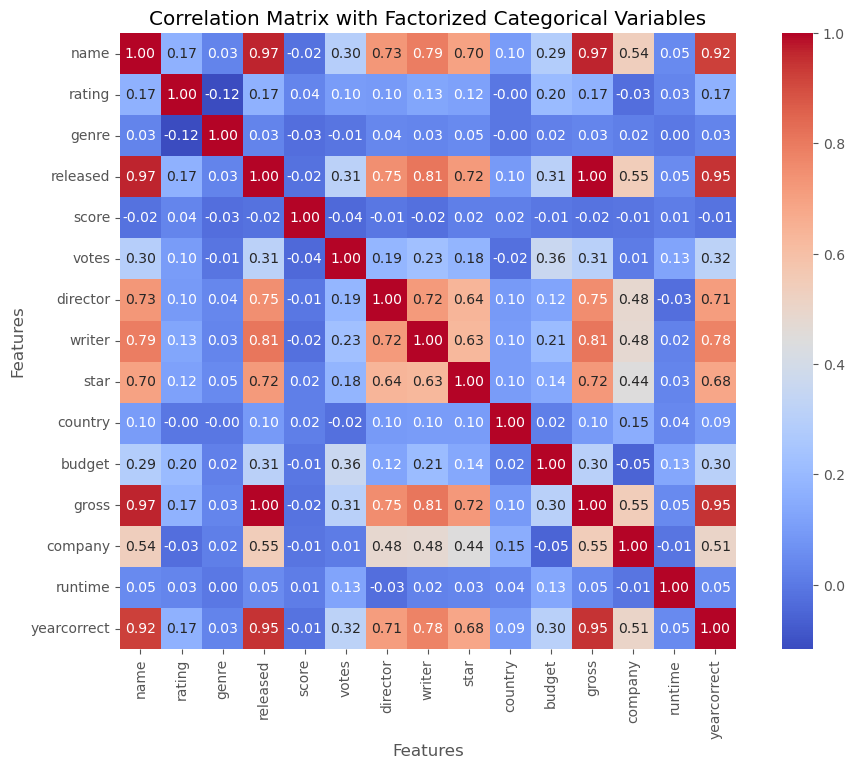

In [103]:
# Factorizing categorical columns and calculating the correlation matrix
factorized_correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(factorized_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix with Factorized Categorical Variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [105]:
# Calculate the correlation matrix using factorized values
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

# Unstack the correlation matrix into a Series
corr_pairs = correlation_mat.unstack()

# Remove self-correlations and duplicate pairs
unique_corr_pairs = corr_pairs[corr_pairs < 1].drop_duplicates()

# Print unique pairs of features and their correlation coefficients
print(unique_corr_pairs.sort_values(ascending=False))

released  gross          0.997885
name      gross          0.967303
          released       0.966086
gross     yearcorrect    0.945864
released  yearcorrect    0.945065
                           ...   
director  runtime       -0.026918
genre     score         -0.027402
score     votes         -0.041981
budget    company       -0.053573
rating    genre         -0.116507
Length: 105, dtype: float64


In [107]:
# Sort the pairs by their correlation coefficients
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

# Print the sorted correlation pairs
print(sorted_pairs)

rating       genre         -0.116507
genre        rating        -0.116507
budget       company       -0.053573
company      budget        -0.053573
votes        score         -0.041981
                              ...   
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 225, dtype: float64


In [109]:
# Filter for strong correlations (greater than 0.5 or less than -0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

# Print the strong correlation pairs
print(strong_pairs)

company      yearcorrect    0.506753
yearcorrect  company        0.506753
name         company        0.535369
company      name           0.535369
             gross          0.545577
                              ...   
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 65, dtype: float64


In [115]:
# Grouping the data by company and summing the gross revenues
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

# Sorting the companies by gross revenue in descending order and selecting the top 15
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending=False)[:15]

# Convert the gross sums to int64
CompanyGrossSumSorted['gross'] = CompanyGrossSumSorted['gross'].astype('int64')

# Display the top 15 companies by gross revenue
print(CompanyGrossSumSorted)

                                 gross
company                               
Warner Bros.               54610959970
Universal Pictures         51241105418
Columbia Pictures          42356430218
Paramount Pictures         40021704691
Walt Disney Pictures       35833650748
Twentieth Century Fox      30198712540
New Line Cinema            19612851164
DreamWorks Animation       11873612858
Dreamworks Pictures        11593807697
Touchstone Pictures        10664679494
Marvel Studios             10120607435
Metro-Goldwyn-Mayer (MGM)   8937010092
Summit Entertainment        8318570396
Pixar Animation Studios     7886344526
Fox 2000 Pictures           7243673721


In [117]:
# Grouping by company and yearcorrect, and summing the gross revenues
company_year_gross = df.groupby(['company', 'yearcorrect'])[['gross']].sum()

# Display the grouped DataFrame
print(company_year_gross)

                                                     gross
company                             yearcorrect           
"DIA" Productions GmbH & Co. KG     2003          44350926
"Weathering With You" Film Partners 2020         193457467
.406 Production                     1997             10580
1492 Pictures                       1996         129832389
                                    1999          87423861
...                                                    ...
erbp                                2013            587174
i am OTHER                          2015          17986781
i5 Films                            2001          10031529
micro_scope                         2011           7099598
thefyzz                             2017          62198461

[2998 rows x 1 columns]


In [119]:
# Grouping by company and yearcorrect, and summing the gross revenues
CompanyGrossSum = df.groupby(['company', 'yearcorrect'])[['gross']].sum()

# Sorting the results by gross revenue in descending order and selecting the top 15
CompanyGrossSumSorted = CompanyGrossSum.sort_values(by='gross', ascending=False)[:15]

# Converting the gross column to int64 type
CompanyGrossSumSorted['gross'] = CompanyGrossSumSorted['gross'].astype('int64')

# Displaying the top 15 companies by gross revenue
print(CompanyGrossSumSorted)

                                       gross
company              yearcorrect            
Walt Disney Pictures 2019         5773131804
Marvel Studios       2018         4018631866
Universal Pictures   2015         3834354888
Walt Disney Pictures 2017         3789382071
Paramount Pictures   2011         3565705182
Warner Bros.         2011         3168551343
Walt Disney Pictures 2010         3104474158
Paramount Pictures   2014         3071298586
Columbia Pictures    2019         2932757449
                     2006         2918469353
Warner Bros.         2018         2774168962
                     2005         2773019821
                     2007         2758633559
Universal Pictures   2017         2729460672
Warner Bros.         2008         2672054137


In [121]:
# Grouping by company and summing the gross revenues
CompanyGrossSum = df.groupby(['company'])[['gross']].sum()

# Sorting the results by gross revenue in descending order and selecting the top 15
CompanyGrossSumSorted = CompanyGrossSum.sort_values(by='gross', ascending=False)[:15]

# Converting the gross column to int64 type (if you want to keep it as a DataFrame)
CompanyGrossSumSorted['gross'] = CompanyGrossSumSorted['gross'].astype('int64')

# Displaying the top 15 companies by gross revenue
print(CompanyGrossSumSorted)

                                 gross
company                               
Warner Bros.               54610959970
Universal Pictures         51241105418
Columbia Pictures          42356430218
Paramount Pictures         40021704691
Walt Disney Pictures       35833650748
Twentieth Century Fox      30198712540
New Line Cinema            19612851164
DreamWorks Animation       11873612858
Dreamworks Pictures        11593807697
Touchstone Pictures        10664679494
Marvel Studios             10120607435
Metro-Goldwyn-Mayer (MGM)   8937010092
Summit Entertainment        8318570396
Pixar Animation Studios     7886344526
Fox 2000 Pictures           7243673721


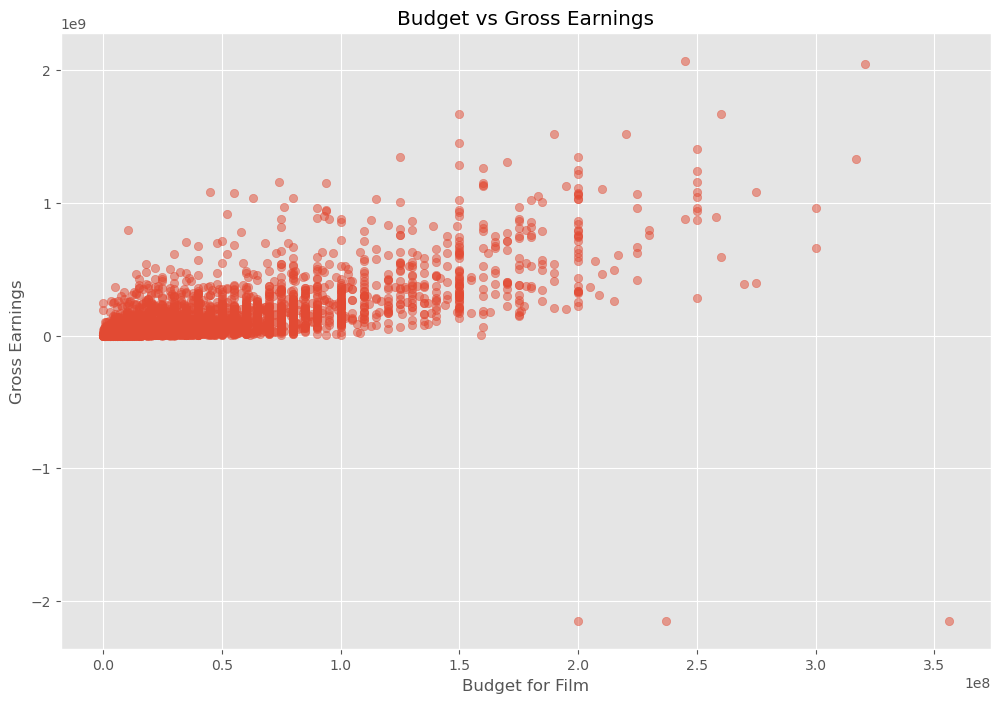

In [123]:
# Scatter plot of Budget vs Gross Earnings
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [125]:
# Creating a copy of the DataFrame to avoid modifying the original
df_numerized = df.copy()

# Loop through each column and convert object columns to category codes
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Displaying the numerized DataFrame
print(df_numerized)

      name  rating  genre  released  score      votes  director  writer  star  \
0     4692       6      6      1304    8.4   927000.0      1795    2832   699   
1     3929       6      1      1127    5.8    65000.0      1578    1158   214   
2     3641       4      0      1359    8.7  1200000.0       757    1818  1157   
3      204       4      4      1127    7.7   221000.0       889    1413  1474   
4      732       6      4      1170    7.3   108000.0       719     351   271   
...    ...     ...    ...       ...    ...        ...       ...     ...   ...   
7648   415       6      0       904    6.6   140000.0        16    2390  1812   
7649  3556       4      0       713    6.5   102000.0       852    2309   147   
7650  1153       4      1       904    5.6    53000.0      1809    2827  1470   
7651  3978       4      1       758    6.8    42000.0       294    2091   640   
7652  4090       3      0       370    6.8     3700.0       746    1184  1839   

      country     budget   

In [127]:
# Calculate the Pearson correlation matrix
correlation_matrix = df_numerized.corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)

                 name    rating     genre  released     score     votes  \
name         1.000000 -0.029234  0.010996 -0.006152  0.014450  0.012615   
rating      -0.029234  1.000000  0.147796  0.018083  0.065983  0.006031   
genre        0.010996  0.147796  1.000000  0.022142  0.035106 -0.135990   
released    -0.006152  0.018083  0.022142  1.000000  0.045874  0.028833   
score        0.014450  0.065983  0.035106  0.045874  1.000000  0.474256   
votes        0.012615  0.006031 -0.135990  0.028833  0.474256  1.000000   
director     0.015246  0.014656 -0.008553  0.002308  0.005413 -0.010376   
writer       0.012880 -0.003149  0.017578  0.008072  0.012843 -0.005316   
star        -0.006882  0.009196  0.003341  0.015706  0.007296 -0.017638   
country     -0.025490  0.008230 -0.009164 -0.017228 -0.043051  0.041551   
budget       0.023392 -0.203946 -0.368523  0.019952  0.072001  0.439675   
gross        0.014073 -0.180805 -0.238629  0.025636  0.201086  0.550649   
company      0.021697 -0.

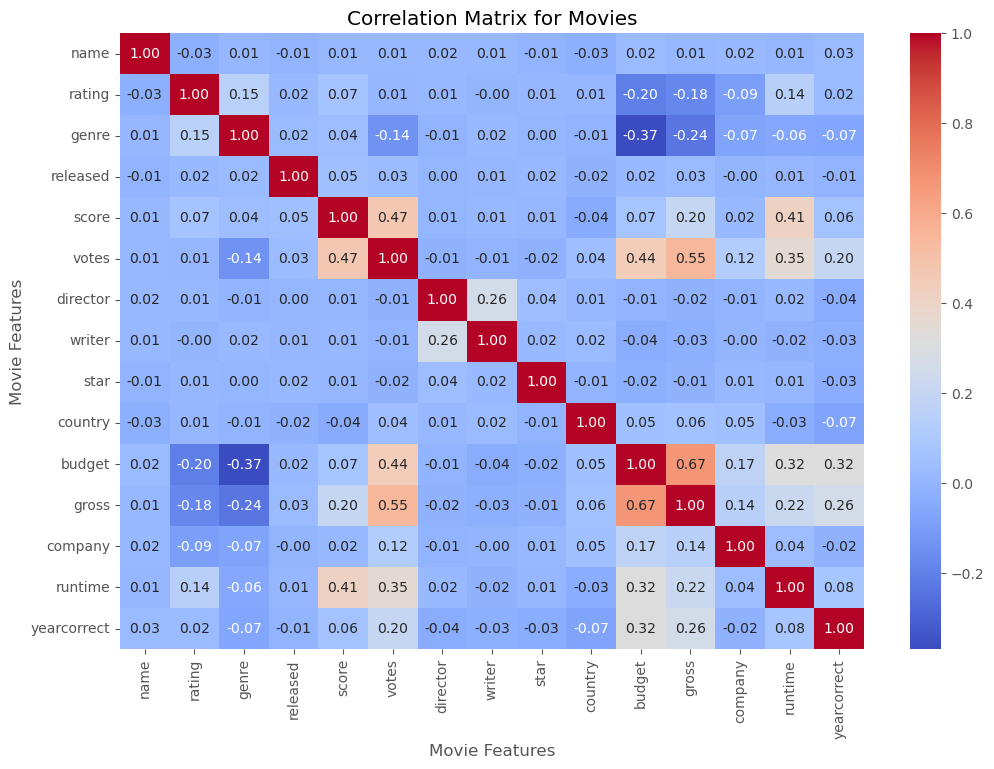

In [129]:
# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))  # Optional: Set the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [131]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):  # Check if the column type is 'object'
        df[col_name] = df[col_name].astype('category')  # Convert the column to a 'category' type
        df[col_name] = df[col_name].cat.codes  # Replace the category with its corresponding numeric code

In [143]:
# Step 1: Identify categorical columns
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2: Convert categorical columns to numeric codes
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Display the DataFrame
print(df)

      name  rating  genre  released  score      votes  director  writer  star  \
0     4692       6      6      1304    8.4   927000.0      1795    2832   699   
1     3929       6      1      1127    5.8    65000.0      1578    1158   214   
2     3641       4      0      1359    8.7  1200000.0       757    1818  1157   
3      204       4      4      1127    7.7   221000.0       889    1413  1474   
4      732       6      4      1170    7.3   108000.0       719     351   271   
...    ...     ...    ...       ...    ...        ...       ...     ...   ...   
7648   415       6      0       904    6.6   140000.0        16    2390  1812   
7649  3556       4      0       713    6.5   102000.0       852    2309   147   
7650  1153       4      1       904    5.6    53000.0      1809    2827  1470   
7651  3978       4      1       758    6.8    42000.0       294    2091   640   
7652  4090       3      0       370    6.8     3700.0       746    1184  1839   

      country     budget   

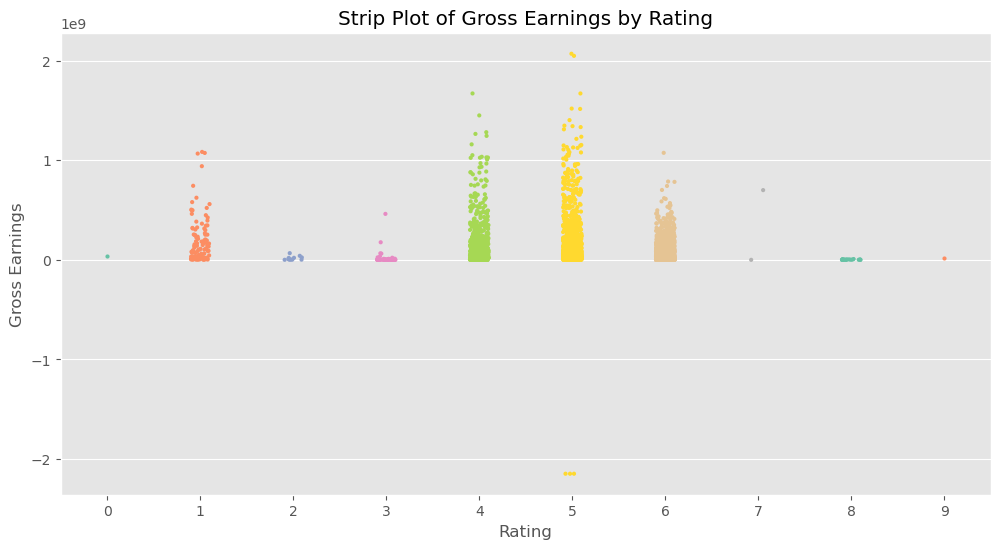

In [153]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a strip plot to visualize gross earnings by rating
# 'jitter=True' adds random noise to the data points for better distribution visibility
# 'hue' colors the points based on the 'rating' category
# 'palette="Set2"' specifies the color palette to use
# 'size=3' sets the size of the markers
sns.stripplot(x="rating", y="gross", data=df, jitter=True, hue='rating', palette="Set2", size=3, legend=False)

# Set the title for the plot
plt.title('Strip Plot of Gross Earnings by Rating')

# Set the label for the x-axis
plt.xlabel('Rating')

# Set the label for the y-axis
plt.ylabel('Gross Earnings')

# Display the plot
plt.show()
